# 2.8 Unit price 를 계단화
- unitprice가 너무 큰 값들이 있어서 DNN하기에도 적합하지 않고, normalize를 하는데, 값이 골고르 
퍼지지 않는 문제가 발생했다. 이를 계단화 함수를 써서, 총 25개의 레벨로 나눔
- ex : 49999 -> 5level

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns



In [4]:
train_data= pd.read_csv('data/train_set/2.7_1pastAvg_diff_buyer.csv')
# test_data=pd.read_csv('data/test_set/2.3work_time.csv')


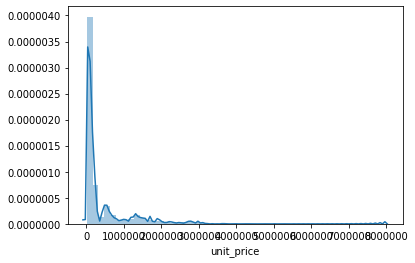

In [8]:
sns.distplot(train_data['unit_price'])

In [13]:
# test_data['unit_price_class'] = np.nan
train_data['unit_price_class'] = np.nan

In [14]:
### case of train
import pdb

for i in range(1, 26):
    step_num = np.percentile(train_data['unit_price'],i*4)
    print(step_num)
    train_data.loc[(train_data['unit_price']<=step_num) & (train_data['unit_price_class'].isnull()),'unit_price_class'] = int(i)
    #test_data.loc[(data['unit_price']<=step_num) & (test_data['unit_price_class'].isnull()),'unit_price_class'] = int(i)    

32900.0
39800.0
39900.0
49000.0
49900.0
59000.0
59900.0
60800.0
69800.0
78000.0
89000.0
89900.0
109800.0
129000.0
158000.0
178000.0
208000.0
229000.0
439000.0
549000.0
749000.0
1200000.0
1499000.0
1930000.0
7930000.0


In [13]:
test_data.loc[:,['unit_price','unit_price_class']]


,unit_price,unit_price_class
0,59800,7.0
1,59800,7.0
2,59800,7.0
3,69900,10.0
4,69900,10.0
...,...,...
2886,0,1.0
2887,0,1.0
2888,0,1.0
2889,69900,10.0


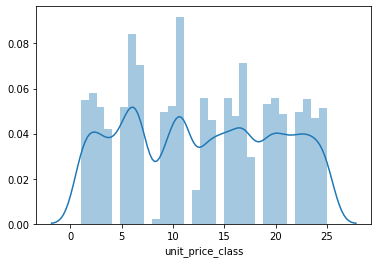

In [15]:
# print(test_data['unit_price_class'].unique())
sns.distplot(train_data['unit_price_class'])

In [19]:
test_data = test_data.loc[test_data.product_category !='무형'].reset_index(drop = True)


In [21]:
test_data

,broadcast_date,broadcast_time,broadcast_code,product_code,product_name,product_category,unit_price,handling_amount,off_day,date,...,snow_seoul,temperature_busan,rain_busan,humid_busan,snow_busan,season,day_dup,week_dup,working_time,unit_price_class
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,False,2020-06-01,...,0.0,18.6,0.0,91,0.0,3,1.0,1.0,False,7.0
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,False,2020-06-01,...,0.0,18.6,0.0,91,0.0,3,2.0,2.0,False,7.0
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,False,2020-06-01,...,0.0,19.2,0.0,87,0.0,3,3.0,3.0,False,7.0
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,False,2020-06-01,...,0.0,19.2,0.0,87,0.0,3,1.0,1.0,False,10.0
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,False,2020-06-01,...,0.0,19.2,0.0,87,0.0,3,2.0,2.0,False,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,2020-07-01 00:10:00,10.000000,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,NaN,False,2020-07-01,...,0.0,21.0,0.0,74,0.0,3,6.0,6.0,False,14.0
2712,2020-07-01 00:10:00,10.000000,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,NaN,False,2020-07-01,...,0.0,21.0,0.0,74,0.0,3,6.0,6.0,False,13.0
2713,2020-07-01 00:10:00,10.000000,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,NaN,False,2020-07-01,...,0.0,21.0,0.0,74,0.0,3,6.0,6.0,False,14.0
2714,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN,False,2020-07-01,...,0.0,20.8,0.0,77,0.0,3,1.0,1.0,False,10.0


In [20]:
test_data.to_csv('data/test_set/2.8_1unit_price_to_class.csv', index = False)